<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project - Bike Sharing</h3>
</div>

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


## Load and Prepare Data

In [2]:
train = pd.read_csv("train.csv")
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [3]:
test = pd.read_csv("test.csv")
test.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000


## EDA and Data Preprocessing

In [4]:
#Shape of Dataset
train.shape, test.shape

((10886, 12), (6493, 9))

In [5]:
#Variables Data Type
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [6]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
# Creat a copy of dataframe to avoid changes on original data
df = train.copy()

# Step 1: Define the mapping dictionaries to replace values with categorical values  
season_mapping = {1 : 'spring', 2 : 'summer', 3 : 'fall',4 : 'winter'}
holiday_mapping = {0 : 'no', 1:'yes'}
workingday_mapping = {0 : 'no', 1 : 'yes'}
weather_mapping = {1:'Clear',
                   2:'Mist,Few Clouds',
                   3:'Light Snow,Rain,Thunderstorm',
                   4:'Heavy Rain, Thunderstorm, Snow, Fog'}

# Step 2: Replace the values in the dataframe using the mapping dictionaries
df['season'] = df['season'].replace(season_mapping)
df['holiday'] = df['holiday'].replace(holiday_mapping)
df['workingday'] = df['workingday'].replace(workingday_mapping)
df['weather'] = df['weather'].replace(weather_mapping)

# Step 3: Make these columns categorical
df['season'] = df['season'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weather'] = df['weather'].astype('category')

# Check changes and new data types
print(df.head())
print(df.dtypes)

              datetime  season holiday workingday weather  temp   atemp  \
0  2011-01-01 00:00:00  spring      no         no   Clear  9.84  14.395   
1  2011-01-01 01:00:00  spring      no         no   Clear  9.02  13.635   
2  2011-01-01 02:00:00  spring      no         no   Clear  9.02  13.635   
3  2011-01-01 03:00:00  spring      no         no   Clear  9.84  14.395   
4  2011-01-01 04:00:00  spring      no         no   Clear  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  
datetime        object
season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
casual           int64
registe

In [8]:
# Now we need to extract time records by year, month and hour

# Step 1: Convert the 'datetime' column to datetime object
df['datetime'] = pd.to_datetime(df['datetime'])

#Step 2: extract month, weekday, hour from 'datetime' column into new column
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['weekday'] = df['datetime'].dt.day_name()
df['hour'] = df['datetime'].dt.hour

# Step 3: Make these columns categorical
df['year'] = df['year'].astype('category')
df['month'] = df['month'].astype('category')
df['weekday'] = df['weekday'].astype('category')
df['hour'] = df['hour'].astype('category')

df.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
year                category
month               category
weekday             category
hour                category
dtype: object

In [9]:
# Removing 'datetime', 'casual', 'registered' columns from dataframe
df.drop('datetime', axis=1, inplace = True)
df.drop('casual', axis=1, inplace = True)
df.drop('registered', axis=1, inplace = True)

df.sample(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,weekday,hour
7147,summer,yes,no,Clear,22.14,25.760,77,15.0013,6,2012,4,Monday,4
8336,fall,no,no,Clear,31.98,37.120,59,0.0000,270,2012,7,Sunday,17
8334,fall,no,no,"Light Snow,Rain,Thunderstorm",37.72,44.695,42,19.0012,298,2012,7,Sunday,15
614,spring,no,yes,Clear,8.20,9.090,32,26.0027,152,2011,2,Tuesday,18
1638,summer,no,yes,Clear,13.94,18.180,76,0.0000,9,2011,4,Thursday,4


##  Strorytelling - Visualization

Strip Plot for Categorical Variables

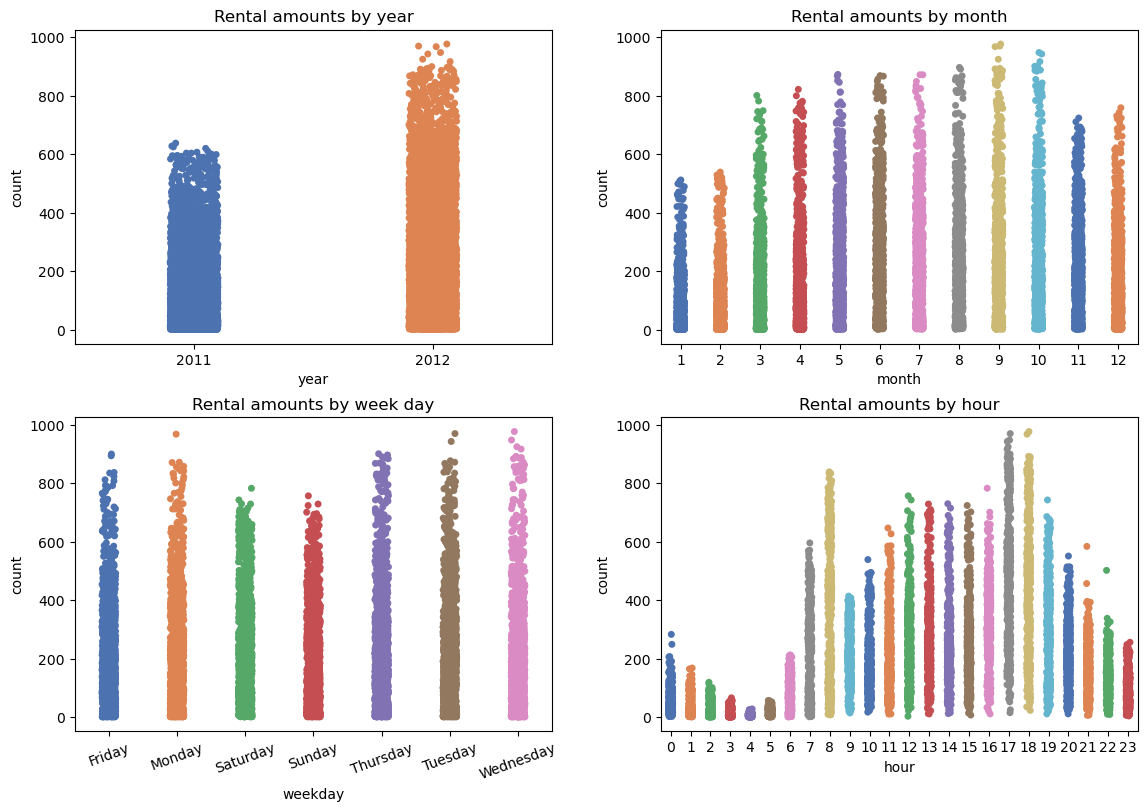

In [10]:
# Create a 2x2 grid of plots
fig, ax = plt.subplots(nrows=2,ncols=2)

# Adjust layout to prevent overlap
plt.tight_layout()

# Set figure size
fig.set_size_inches(12,8)

# Set plot style
sns.set(style="whitegrid")

# Create strip plots
sns.stripplot(x='year', y = 'count', data=df, hue = 'year', palette='deep', ax = ax[0,0],legend=False)
sns.stripplot(x='month', y = 'count', data=df, hue='month', palette='deep', ax = ax[0,1],legend=False)
sns.stripplot(x='weekday', y = 'count', data=df, hue= 'weekday', palette='deep', ax = ax[1,0],legend=False)
sns.stripplot(x='hour', y = 'count', data=df, hue= 'hour', palette='deep', ax = ax[1,1],legend=False);

# Set title for subplots
ax[0, 0].set(title='Rental amounts by year')
ax[0, 1].set(title='Rental amounts by month')
ax[1, 0].set(title='Rental amounts by week day')
ax[1, 1].set(title='Rental amounts by hour')

# Rotate x-axis labels in the bottom-left plot
ax[1,0].tick_params(axis='x', labelrotation=20);

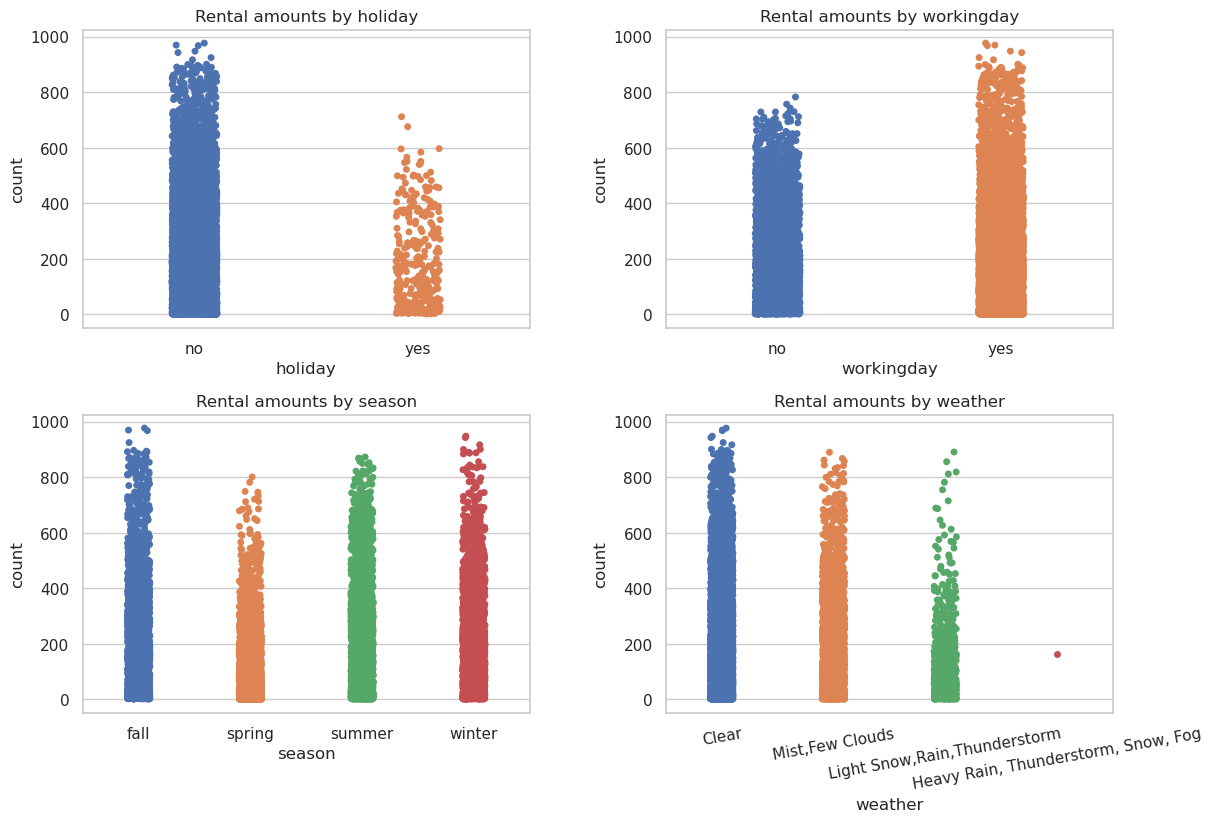

In [11]:
# As done previously
fig, ax = plt.subplots(nrows=2,ncols=2)
plt.tight_layout()
fig.set_size_inches(12,8)
sns.set(style="whitegrid")

# Specify weather category order to enhance plot readability
weather_order = ['Clear', 'Mist,Few Clouds', 'Light Snow,Rain,Thunderstorm', 'Heavy Rain, Thunderstorm, Snow, Fog']

# Create strip plots
sns.stripplot(data=df, x='holiday', y='count',hue='holiday', legend=False, palette='deep', ax = ax[0,0])
sns.stripplot(data=df, x='season', y='count',hue='season', legend=False, palette='deep', ax = ax[1,0] )
sns.stripplot(data=df, x='workingday', y='count',hue='workingday', legend=False, palette='deep', ax = ax[0,1])
sns.stripplot(data=df, x='weather', y='count',hue='weather', legend=False, palette='deep', ax = ax[1,1], order = weather_order, hue_order=weather_order)

# Set title for subplots
ax[0, 0].set(title='Rental amounts by holiday')
ax[0, 1].set(title='Rental amounts by workingday')
ax[1, 0].set(title='Rental amounts by season')
ax[1, 1].set(title='Rental amounts by weather')

# Rotate x-axis labels in the bottom-right plot
ax[1,1].tick_params(axis='x', labelrotation=10);

according to weather plot it seems we have an oulier in bad weather situation and later we will delete that from our dataframe to avoid effecting on our model

In [12]:
df['weather'].value_counts()

weather
Clear                                  7192
Mist,Few Clouds                        2834
Light Snow,Rain,Thunderstorm            859
Heavy Rain, Thunderstorm, Snow, Fog       1
Name: count, dtype: int64

In [13]:
outlier = df[df['weather'] == 'Heavy Rain, Thunderstorm, Snow, Fog'].index
df.drop(outlier, inplace = True)
df.reset_index(drop= True, inplace=True)
df['weather'].value_counts()

weather
Clear                                  7192
Mist,Few Clouds                        2834
Light Snow,Rain,Thunderstorm            859
Heavy Rain, Thunderstorm, Snow, Fog       0
Name: count, dtype: int64

Scatter Plot with Regression Line for Numeric Variables

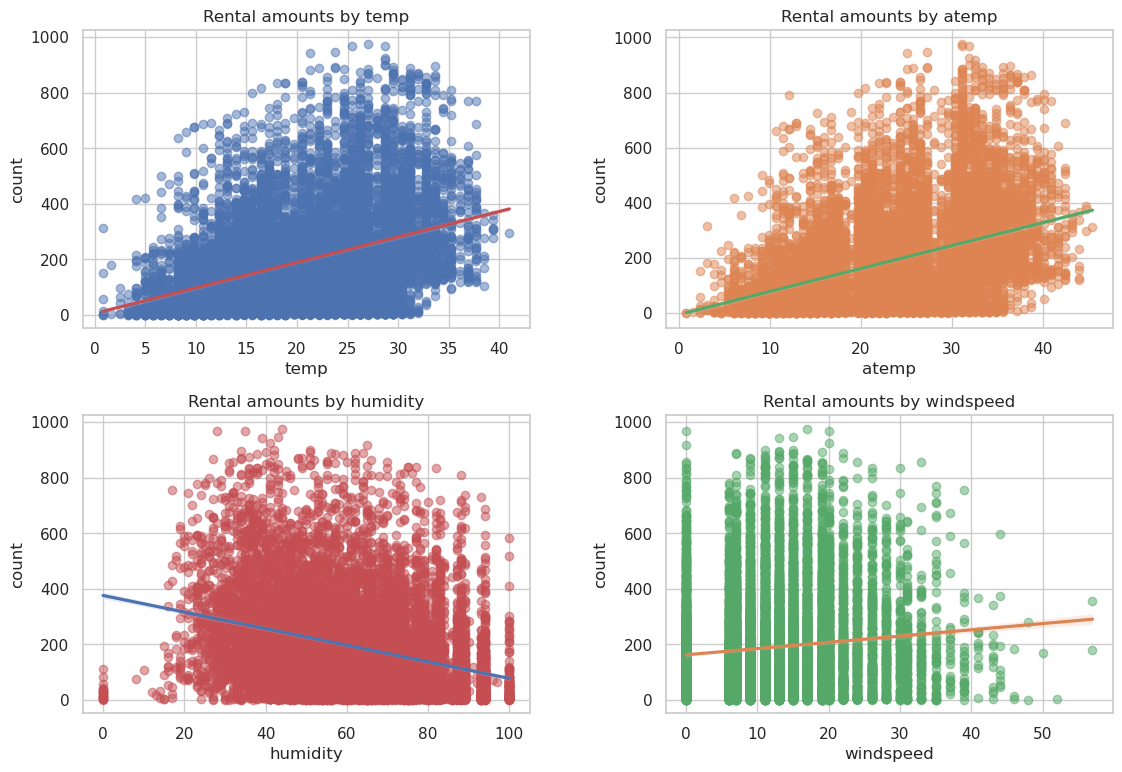

In [14]:
# As done previously
fig, ax = plt.subplots(nrows=2,ncols=2)
plt.tight_layout()
fig.set_size_inches(12,8)
sns.set(style="whitegrid")

# Define a color palette for consistent coloring
palette = sns.color_palette("deep")

# Create regression plots
sns.regplot(data = df, x = 'temp', y='count', scatter_kws={'alpha': 0.5, 'color': palette[0]},
            line_kws={'color': palette[3]}, ax = ax[0,0])

sns.regplot(data = df, x = 'atemp', y='count', scatter_kws={'alpha': 0.5, 'color': palette[1]},
            line_kws={'color': palette[2]}, ax = ax[0,1])

sns.regplot(data = df, x = 'humidity', y='count', scatter_kws={'alpha': 0.5, 'color': palette[3]},
            line_kws={'color': palette[0]}, ax = ax[1,0])

sns.regplot(data = df, x = 'windspeed', y='count', scatter_kws={'alpha': 0.5, 'color': palette[2]},
            line_kws={'color': palette[1]}, ax = ax[1,1])

# Set title for subplots
ax[0, 0].set(title='Rental amounts by temp')
ax[0, 1].set(title='Rental amounts by atemp')
ax[1, 0].set(title='Rental amounts by humidity')
ax[1, 1].set(title='Rental amounts by windspeed');


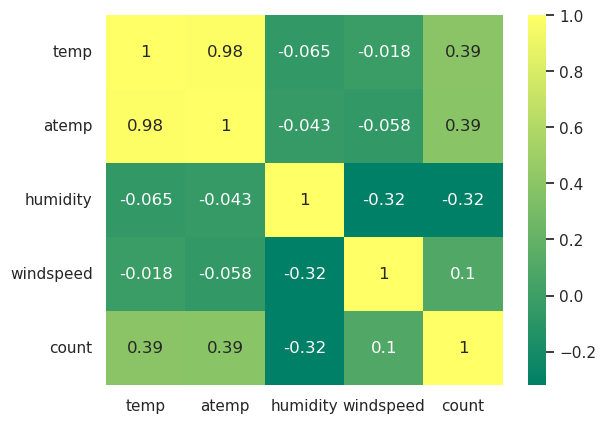

In [15]:
# heatmap for numeric types
numerical_columns = df.select_dtypes(include=['number']).columns
corr = df[numerical_columns].corr()
sns.heatmap(corr, annot=True, cmap='summer');


### Prepare Data for Train model

In [16]:
#Drop atemp cuase it has near 1 corr to temp and its useless
df.drop('atemp', axis=1, inplace=True)
df.sample(3)

,season,holiday,workingday,weather,temp,humidity,windspeed,count,year,month,weekday,hour
9048,fall,no,no,"Mist,Few Clouds",27.88,69,0.0000,425,2012,8,Sunday,10
1556,summer,no,no,"Mist,Few Clouds",21.32,72,12.9980,236,2011,4,Sunday,17
10596,winter,no,yes,"Mist,Few Clouds",14.76,93,6.0032,122,2012,12,Friday,23


Now we use one hot encoding and target encoding for categorical data

One-Hot Encoding: Used for categorical features with a limited number of distinct categories (e.g., season, holiday, weather conditions). It creates a new binary column for each category, indicating presence (1) or absence (0) of that category.

Target Encoding: Useful for categorical features with many categories or those that directly influence the target variable (e.g., hour of the day, month, weekday). It replaces each category with the mean of the target variable for that category, capturing the relationship between the category and the target.



In [17]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder

# Features to be one-hot encoded
one_hot_features = ['weather', 'holiday', 'workingday', 'year', 'season']

# Apply one-hot encoding
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
one_hot_encoded = one_hot_encoder.fit_transform(df[one_hot_features])

# Create DataFrame for one-hot encoded features
one_hot_encoded_df = pd.DataFrame(
    one_hot_encoded, 
    columns=one_hot_encoder.get_feature_names_out(one_hot_features)
)

# Features for target encoding
target_encode_features = ['month', 'weekday', 'hour']

# Apply target encoding
target_encoder = TargetEncoder()
target_encoded = target_encoder.fit_transform(df[target_encode_features], df['count'])
target_encoded = target_encoded.rename(columns={'month': 'month_en', 'weekday': 'weekday_en', 'hour': 'hour_en'})
# Combine one-hot encoded and target encoded features with the original dataframe
df_encoded = df.drop(columns=(one_hot_features + target_encode_features))

# Dataframe for encoded features and features to check results (target encoder only)
df_combine = pd.concat([df[target_encode_features], target_encoded], axis = 1)

# Display some samples 
df_combine.sample(6)

,month,weekday,hour,month_en,weekday_en,hour_en
4825,11,Monday,3,193.677278,190.407742,11.757506
5788,1,Monday,9,90.283126,190.407742,221.780220
1750,4,Monday,20,184.160616,190.407742,228.517544
3393,8,Thursday,7,234.118421,197.296201,213.116484
9831,10,Sunday,1,227.699232,180.839772,33.859031
9126,9,Monday,16,233.805281,190.407742,316.372807


In [18]:
# Creat a dict for encode test data set in future
month_dict = dict(zip(df['month'], target_encoded['month_en']))
weekday_dict = dict(zip(df['weekday'], target_encoded['weekday_en']))
hour_dict = dict(zip(df['hour'], target_encoded['hour_en']))

 you can compare this result with the chart before

In [19]:
# encoded dataframe 
df_encoded = pd.concat([df_encoded, one_hot_encoded_df, target_encoded], axis = 1)
df_encoded.sample(5)

,temp,humidity,windspeed,count,"weather_Light Snow,Rain,Thunderstorm","weather_Mist,Few Clouds",holiday_yes,workingday_yes,year_2012,season_spring,season_summer,season_winter,month_en,weekday_en,hour_en
7924,34.44,30,8.9981,500,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,242.031798,180.839772,243.442982
5687,14.76,93,12.9980,2,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,90.283126,197.296201,6.407240
4689,18.86,63,8.9981,147,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,193.677278,189.723847,210.674725
9291,26.24,38,15.0013,323,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,233.805281,190.407742,257.787281
3785,26.24,94,19.0012,113,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,233.805281,197.296201,468.765351



## Train your model (Regression)

In [20]:
# At first we check to see which model has the best prediction
# split train and test
from sklearn.model_selection import train_test_split

X = df_encoded.drop('count', axis = 1)
y = df_encoded['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

#### Linear Regression 

Mean Squared Error: 10261.88758120283
R2 Score : 0.6899069264433317


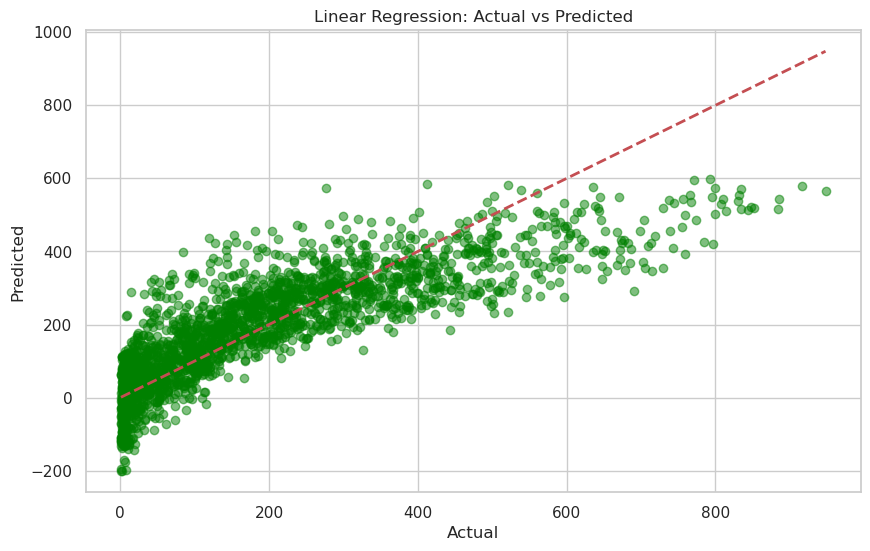

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target values for the test set
y_pred_linear = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R2 Score : {r2_linear}")

# Plot the actual vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_linear, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()


#### Polynomial Regression

Mean Squared Error : 4875.282370517721
R2 Score : 0.8526790239351583


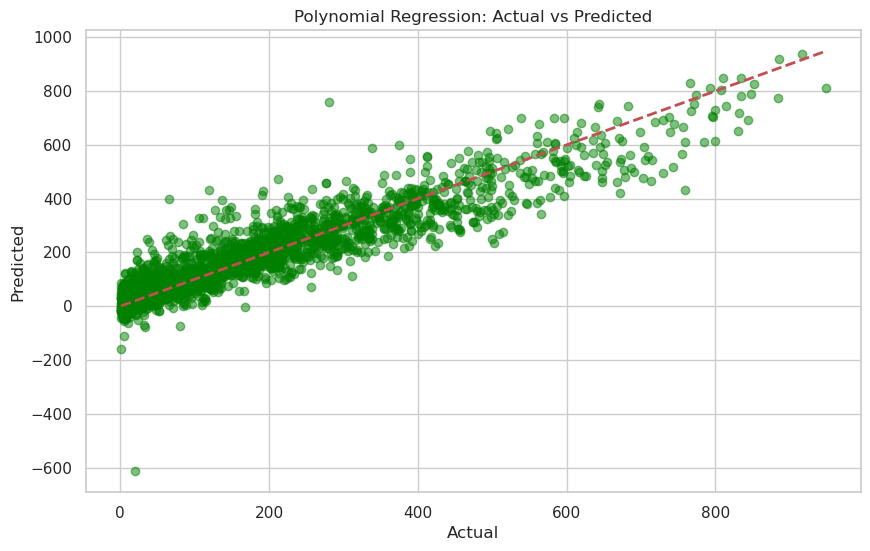

In [22]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features
degree = 3  # Degree of the polynomial
poly = PolynomialFeatures(degree=degree)

# Transform features
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Train Linear Regression on polynomial features
model_poly = LinearRegression()
model_poly.fit(X_poly_train, y_train)

# Predict and evaluate
y_pred_poly = model_poly.predict(X_poly_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Print metrics
print(f"Mean Squared Error : {mse_poly}")
print(f"R2 Score : {r2_poly}")

# Plot results
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_poly, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Polynomial Regression: Actual vs Predicted')
plt.show()



#### KNN Regression

Mean Squared Error (MSE): 10683.790941662839
R2 Score : 0.6771578772305362


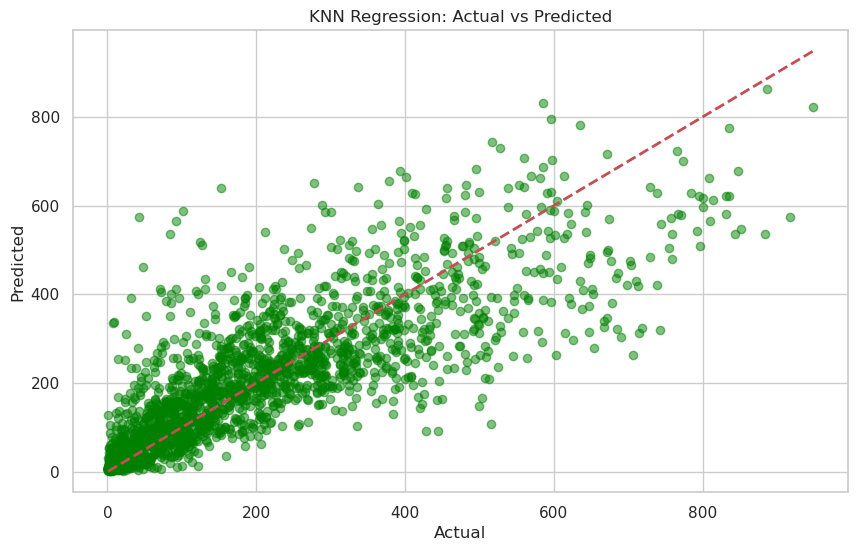

In [23]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize and train KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)  # Number of neighbors (k) can be adjusted
knn_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Print metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R2 Score : {r2_knn}")

# Plot results
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_knn, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('KNN Regression: Actual vs Predicted')
plt.show()


#### decision tree

Mean Squared Error (MSE) : 3956.6715663757464
R2 Score : 0.8804375474431071


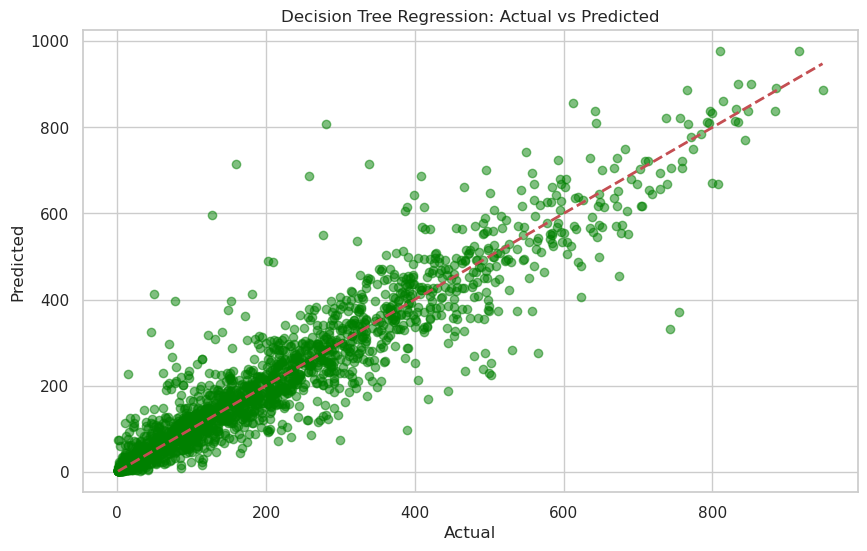

In [24]:
# Import necessary library
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Create and train Decision Tree Regressor
decision_tree_model = DecisionTreeRegressor(random_state=4)
decision_tree_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_decision_tree = decision_tree_model.predict(X_test)
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

# Print metrics
print(f"Mean Squared Error (MSE) : {mse_decision_tree}")
print(f"R2 Score : {r2_decision_tree}")

# Plot results
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_decision_tree, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree Regression: Actual vs Predicted')
plt.show()


Random forrest


Mean Squared Error (MSE): 1816.1941712853315
R2 Score: 0.9451183587529068


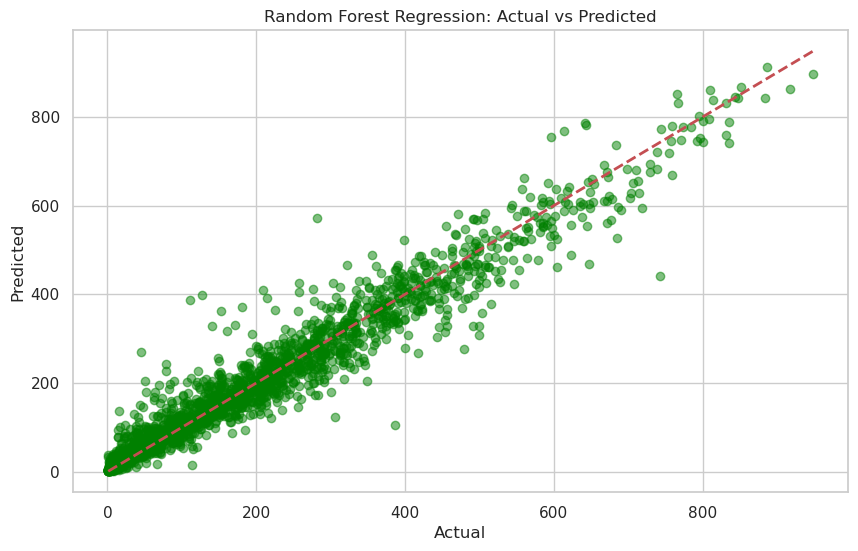

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and fit the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=4)
rf_regressor.fit(X_train, y_train)

# Predict on test data
y_pred_RF = rf_regressor.predict(X_test)

# Calculate metrics
mse_RF = mean_squared_error(y_test, y_pred_RF)
r2_RF = r2_score(y_test, y_pred_RF)

print(f'Mean Squared Error (MSE): {mse_RF}')
print(f'R2 Score: {r2_RF}')

# Plot results
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_RF, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regression: Actual vs Predicted')
plt.show()

## Test Result

Based on R2 score it seems random forrest is best choice to predict the test dataframe.
Initially, we need to transform the features of the test dataframe in the same way as the dataframe used for training the model.

In [26]:
test_df = test.copy()

# Step 1: Replace the values in the dataframe using the mapping dictionaries from before
test_df['season'] = test_df['season'].replace(season_mapping)
test_df['holiday'] = test_df['holiday'].replace(holiday_mapping)
test_df['workingday'] = test_df['workingday'].replace(workingday_mapping)
test_df['weather'] = test_df['weather'].replace(weather_mapping)

# Step 2: Make these columns categorical
test_df['season'] = test_df['season'].astype('category')
test_df['holiday'] = test_df['holiday'].astype('category')
test_df['workingday'] = test_df['workingday'].astype('category')
test_df['weather'] = test_df['weather'].astype('category')


In [27]:
# Step 3: Extract the values from the datetime column.

test_df['datetime'] = pd.to_datetime(test_df['datetime'])
test_df['year'] = test_df['datetime'].dt.year
test_df['month']= test_df['datetime'].dt.month
test_df['weekday']= test_df['datetime'].dt.day_name()
test_df['hour'] = test_df['datetime'].dt.hour

# Step 4: Apply one-hot encoding
test_one_hot_encoded = one_hot_encoder.fit_transform(test_df[one_hot_features])
test_one_hot_encoded_df = pd.DataFrame(
    test_one_hot_encoded, 
    columns=one_hot_encoder.get_feature_names_out(one_hot_features))

# Step 4: Apply values computed in target encoding.
test_target_encoded = pd.DataFrame()
test_target_encoded['month_en'] = test_df['month'].map(month_dict)
test_target_encoded['weekday_en'] = test_df['weekday'].map(weekday_dict)
test_target_encoded['hour_en'] = test_df['hour'].map(hour_dict)

#Step 5: Concatenate features for prediction.
encoded_test = pd.concat([test_df[['temp', 'humidity', 'windspeed']], test_one_hot_encoded_df, test_target_encoded], axis = 1)

encoded_test.sample(5)

,temp,humidity,windspeed,"weather_Heavy Rain, Thunderstorm, Snow, Fog","weather_Light Snow,Rain,Thunderstorm","weather_Mist,Few Clouds",holiday_yes,workingday_yes,year_2012,season_spring,season_summer,season_winter,month_en,weekday_en,hour_en
53,0.82,44,15.0013,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,90.283126,196.665404,76.259341
3035,13.12,66,0.0000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,175.614035,196.665404,33.859031
4162,13.94,66,0.0000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,184.160616,188.411348,76.259341
564,10.66,93,22.0028,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,148.169811,197.296201,175.092308
1513,27.88,79,19.9995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,242.031798,188.411348,33.859031


In [28]:
# Drop the column 'weather_Heavy Rain', 'Thunderstorm', 'Snow', and 'Fog'.
encoded_test.drop('weather_Heavy Rain, Thunderstorm, Snow, Fog', axis=1, inplace=True)
encoded_test.head()

,temp,humidity,windspeed,"weather_Light Snow,Rain,Thunderstorm","weather_Mist,Few Clouds",holiday_yes,workingday_yes,year_2012,season_spring,season_summer,season_winter,month_en,weekday_en,hour_en
0,10.66,56,26.0027,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,90.283126,197.296201,55.138462
1,10.66,56,0.0000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,90.283126,197.296201,33.859031
2,10.66,56,0.0000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,90.283126,197.296201,22.899554
3,10.66,56,11.0014,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,90.283126,197.296201,11.757506
4,10.66,56,11.0014,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,90.283126,197.296201,6.407240


In [29]:
encoded_test.head()

,temp,humidity,windspeed,"weather_Light Snow,Rain,Thunderstorm","weather_Mist,Few Clouds",holiday_yes,workingday_yes,year_2012,season_spring,season_summer,season_winter,month_en,weekday_en,hour_en
0,10.66,56,26.0027,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,90.283126,197.296201,55.138462
1,10.66,56,0.0000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,90.283126,197.296201,33.859031
2,10.66,56,0.0000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,90.283126,197.296201,22.899554
3,10.66,56,11.0014,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,90.283126,197.296201,11.757506
4,10.66,56,11.0014,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,90.283126,197.296201,6.407240


### Make predictaion

In [30]:
# Predict using the decision tree model
predictions = decision_tree_model.predict(encoded_test)

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(predictions, columns=['Predicted'])

# Display a random sample of 5 predictions
predictions_df.sample(5)

,Predicted
2804,254.0
3477,184.0
3333,132.0
2085,132.0
3382,188.0


In [31]:
# Combine test_df with predictions
predicted_df = pd.concat([test_df, predictions_df], axis=1)

# Random sample of result
predicted_df.sample(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,weekday,hour,Predicted
5333,2012-08-28 01:00:00,fall,no,yes,Clear,27.88,31.820,89,12.9980,2012,8,Tuesday,1,13.0
6420,2012-12-28 23:00:00,spring,no,yes,"Mist,Few Clouds",9.84,12.880,65,6.0032,2012,12,Friday,23,93.0
3495,2012-01-31 08:00:00,spring,no,yes,Clear,10.66,13.635,60,7.0015,2012,1,Tuesday,8,508.0
3348,2012-01-25 05:00:00,spring,no,yes,Clear,10.66,12.120,70,19.0012,2012,1,Wednesday,5,12.0
5412,2012-08-31 08:00:00,fall,no,yes,"Mist,Few Clouds",28.70,33.335,74,0.0000,2012,8,Friday,8,705.0
142,2011-01-26 02:00:00,spring,no,yes,"Light Snow,Rain,Thunderstorm",9.02,11.365,69,12.9980,2011,1,Wednesday,2,3.0
2215,2011-09-23 20:00:00,winter,no,yes,Clear,24.60,25.760,94,0.0000,2011,9,Friday,20,197.0
5424,2012-08-31 20:00:00,fall,no,yes,Clear,32.80,37.120,49,8.9981,2012,8,Friday,20,389.0
1312,2011-06-20 16:00:00,summer,no,yes,Clear,28.70,32.575,58,11.0014,2011,6,Monday,16,263.0
3795,2012-03-21 23:00:00,summer,no,yes,Clear,22.14,25.760,77,0.0000,2012,3,Wednesday,23,91.0


by: behrad.karimi@gmail.com